### ALP Responsi
  - Angel Aprilia Putri Lo (0706022210003)
  - Mario Giancarlo Cahyadi (0706022210020)

### Import Library

Import the necessary libraries

In [1]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

### Load Dataset

A student depression dataset typically contains data aimed at analyzing, understanding, and predicting depression levels among students. It may include features such as demographic information (age, gender), academic performance (grades, attendance), lifestyle habits (sleep patterns, exercise, social activities), mental health history, and responses to standardized depression scales.

These datasets are valuable for research in psychology, data science, and education to identify factors contributing to student depression and to design early intervention strategies. Ethical considerations like privacy, informed consent, and anonymization of data are crucial in working with such sensitive information.

##### Variables:
- id: Unique identifier for each individual.
- Gender: The gender of the individual.
- Age: The age of the individual.
- City: The city where the individual resides.
- Profession: The profession or occupation of the individual.
- Academic Pressure: The level of academic pressure experienced by the individual.
- Work Pressure: The level of work-related pressure experienced by the individual.
- CGPA: The cumulative grade point average of the individual (for students).
- Study Satisfaction: The individual’s satisfaction level with their studies.
- Job Satisfaction: The individual’s satisfaction level with their job.
- Sleep Duration: The average number of hours of sleep the individual gets daily.
- Dietary Habits: The quality or type of dietary habits followed by the individual.
- Degree: The educational degree or level attained by the individual.
- Have you ever had suicidal thoughts?: Whether the individual has ever experienced suicidal thoughts (Yes/No).
- Work/Study Hours: The average number of hours spent working or studying daily.
- Financial Stress: The level of financial stress experienced by the individual.
- Family History of Mental Illness: Whether there is a family history of mental illness (Yes/No)
- Depression: Whether the individual is experiencing or has experienced depression (1/0).


In [2]:
# Load dataset and show the first five rows
df = pd.read_csv('https://raw.githubusercontent.com/AngelApriliaPutri/Data-Mining/refs/heads/main/Student%20Depression%20Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [4]:
# Describe data
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


### Data Preparation

1. Check if there are any missing values in the data.
2. Encode data.
3. Apply feature scaling to the data.

In [5]:
# Check for null values in the dataset
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [6]:
df = df.dropna(axis=0)
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [7]:
# Drop the column 'ID' because it is not relevant
df.drop('id', axis=1, inplace=True)

<ipython-input-7-32c6c23df262>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('id', axis=1, inplace=True)


In [8]:
gender_count = df['Gender'].value_counts()
print(gender_count)
age_count = df['Age'].value_counts()
print(age_count)
city_count = df['City'].value_counts()
print(city_count)
profession_count = df['Profession'].value_counts()
print(profession_count)
academic_count = df['Academic Pressure'].value_counts()
print(academic_count)
work_count = df['Work Pressure'].value_counts()
print(work_count)
cgpa_count = df['CGPA'].value_counts()
print(cgpa_count)
study_count = df['Study Satisfaction'].value_counts()
print(study_count)

Gender
Male      15546
Female    12352
Name: count, dtype: int64
Age
24.0    2258
20.0    2236
28.0    2133
29.0    1949
33.0    1893
25.0    1784
21.0    1726
23.0    1645
18.0    1587
19.0    1560
34.0    1468
27.0    1462
31.0    1427
32.0    1261
22.0    1160
26.0    1155
30.0    1145
35.0      10
38.0       8
36.0       7
42.0       4
48.0       3
39.0       3
43.0       2
46.0       2
37.0       2
49.0       1
51.0       1
44.0       1
59.0       1
54.0       1
58.0       1
56.0       1
41.0       1
Name: count, dtype: int64
City
Kalyan                1570
Srinagar              1372
Hyderabad             1339
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1065
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885

In [9]:
job_count = df['Job Satisfaction'].value_counts()
print(job_count)
sleep_count = df['Sleep Duration'].value_counts()
print(sleep_count)
dietary_count = df['Dietary Habits'].value_counts()
print(dietary_count)
degree_count = df['Degree'].value_counts()
print(degree_count)
have_count = df['Have you ever had suicidal thoughts ?'].value_counts()
print(have_count)
work_study_count = df['Work/Study Hours'].value_counts()
print(work_study_count)
financial_count = df['Financial Stress'].value_counts()
print(financial_count)
family_count = df['Family History of Mental Illness'].value_counts()
print(family_count)
depression_count = df['Depression'].value_counts()
print(depression_count)

Job Satisfaction
0.0    27890
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64
Sleep Duration
Less than 5 hours    8309
7-8 hours            7346
5-6 hours            6181
More than 8 hours    6044
Others                 18
Name: count, dtype: int64
Dietary Habits
Unhealthy    10316
Moderate      9921
Healthy       7649
Others          12
Name: count, dtype: int64
Degree
Class 12    6080
B.Ed        1866
B.Com       1506
B.Arch      1478
BCA         1432
MSc         1190
B.Tech      1152
MCA         1044
M.Tech      1022
BHM          925
BSc          888
M.Ed         821
B.Pharm      810
M.Com        734
BBA          696
MBBS         695
LLB          671
BE           613
BA           600
M.Pharm      582
MD           572
MBA          562
MA           544
PhD          522
LLM          482
MHM          191
ME           185
Others        35
Name: count, dtype: int64
Have you ever had suicidal thoughts ?
Yes    17656
No     10242
Name: count, dtype: int64
Work/

In [10]:
# Correcting city name typos, keeping the original count intact
typo_corrections = {
    'Nalyan': 'Kalyan',
    'Khaziabad': 'Ghaziabad'
}

# Apply corrections for city names
df['City'] = df['City'].replace(typo_corrections)

<ipython-input-10-a2c85192a98b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['City'].replace(typo_corrections)


In [11]:
# Get the count of occurrences for each city
city_counts = df['City'].value_counts()

# Get cities with 400 or more occurrences
cities_to_keep = city_counts[city_counts >= 400].index

# Filter the dataframe to keep only cities with 400 or more occurrences
df = df[df['City'].isin(cities_to_keep)]

# Display the value_counts after filtering
df['City'].value_counts()

,count
City,
Kalyan,1571
Srinagar,1372
Hyderabad,1339
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


In [12]:
# Drop the 'Profession' column as it's not needed
df = df.drop(columns=['Profession'])

# Display the remaining columns to verify
df.head()

,Gender,Age,City,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [13]:
# Remove rows where Age is greater than 34
df = df[df['Age'] <= 34]

# Display the distribution of each category
df['Age'].value_counts()

,count
Age,
24.0,2258
20.0,2234
28.0,2132
29.0,1942
33.0,1893
25.0,1783
21.0,1721
23.0,1644
18.0,1586


In [14]:
# Filter out rows where 'Academic Pressure' is 0.0
df = df[df['Academic Pressure'] != 0.0]

# Display the value_counts after filtering to verify
df['Academic Pressure'].value_counts()

,count
Academic Pressure,
3.0,7442
5.0,6278
4.0,5148
1.0,4783
2.0,4167


In [15]:
# Drop the 'Work Pressure ' column as it's not needed
df = df.drop(columns=['Work Pressure'])

# Display the remaining columns to verify
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [16]:
# Filter out rows where 'Study Satisfaction' is 0.0
df = df[df['Study Satisfaction'] != 0.0]

# Display the value_counts after filtering to verify
df['Study Satisfaction'].value_counts()

,count
Study Satisfaction,
4.0,6348
2.0,5825
3.0,5804
1.0,5429
5.0,4409


In [17]:
# Drop the 'Job Satisfaction' column as it's not needed
df = df.drop(columns=['Job Satisfaction'])

# Display the remaining columns to verify
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [18]:
# Remove rows where 'Sleep Duration' is "Others"
df = df[df['Sleep Duration'] != 'Others']

In [19]:
# Remove rows where 'Dietary Habits' is "Others"
df = df[df['Dietary Habits'] != 'Others']

In [20]:
# Function to categorize Degree
def categorize_degree(degree):
    # Define categories and their respective degrees
    pre_university = ['Class 12']
    undergraduate = ['B.Ed', 'B.Com', 'B.Arch', 'BCA', 'B.Tech', 'BHM', 'BSc',
                     'B.Pharm', 'BBA', 'MBBS', 'LLB', 'BE', 'BA']
    postgraduate = ['MSc', 'MCA', 'M.Tech', 'M.Ed', 'M.Com', 'M.Pharm', 'MD',
                    'MBA', 'MA', 'PhD', 'LLM', 'MHM', 'ME']

    # Categorize based on the degree
    if degree in pre_university:
        return 'Pre-University'
    elif degree in undergraduate:
        return 'Undergraduate'
    elif degree in postgraduate:
        return 'Postgraduate'
    else:
        return 'Others'

# Apply the function to the 'Degree' column
df['Degree'] = df['Degree'].apply(categorize_degree)

# Remove rows with 'Others' in Degree
df = df[df['Degree'] != 'Others']

# Display the updated value counts
df['Degree'].value_counts()


,count
Degree,
Undergraduate,13286
Postgraduate,8410
Pre-University,6054


In [21]:
gender_count = df['Gender'].value_counts()
print(gender_count)
age_count = df['Age'].value_counts()
print(age_count)
city_count = df['City'].value_counts()
print(city_count)
academic_count = df['Academic Pressure'].value_counts()
print(academic_count)
cgpa_count = df['CGPA'].value_counts()
print(cgpa_count)
study_count = df['Study Satisfaction'].value_counts()
print(study_count)

Gender
Male      15472
Female    12278
Name: count, dtype: int64
Age
24.0    2254
20.0    2228
28.0    2125
29.0    1939
33.0    1890
25.0    1780
21.0    1719
23.0    1637
18.0    1580
19.0    1559
34.0    1463
27.0    1456
31.0    1421
32.0    1255
22.0    1157
26.0    1151
30.0    1136
Name: count, dtype: int64
City
Kalyan           1566
Srinagar         1365
Hyderabad        1335
Vasai-Virar      1286
Lucknow          1150
Thane            1138
Ludhiana         1106
Agra             1089
Surat            1076
Kolkata          1055
Jaipur           1035
Patna             999
Pune              966
Visakhapatnam     964
Ahmedabad         944
Bhopal            929
Chennai           883
Meerut            820
Rajkot            810
Delhi             765
Bangalore         765
Ghaziabad         741
Mumbai            694
Vadodara          690
Varanasi          682
Nagpur            646
Indore            642
Kanpur            607
Nashik            544
Faridabad         458
Name: count, dtype:

In [22]:
sleep_count = df['Sleep Duration'].value_counts()
print(sleep_count)
dietary_count = df['Dietary Habits'].value_counts()
print(dietary_count)
degree_count = df['Degree'].value_counts()
print(degree_count)
have_count = df['Have you ever had suicidal thoughts ?'].value_counts()
print(have_count)
work_study_count = df['Work/Study Hours'].value_counts()
print(work_study_count)
financial_count = df['Financial Stress'].value_counts()
print(financial_count)
family_count = df['Family History of Mental Illness'].value_counts()
print(family_count)
depression_count = df['Depression'].value_counts()
print(depression_count)

Sleep Duration
Less than 5 hours    8272
7-8 hours            7309
5-6 hours            6148
More than 8 hours    6021
Name: count, dtype: int64
Dietary Habits
Unhealthy    10263
Moderate      9871
Healthy       7616
Name: count, dtype: int64
Degree
Undergraduate     13286
Postgraduate       8410
Pre-University     6054
Name: count, dtype: int64
Have you ever had suicidal thoughts ?
Yes    17575
No     10175
Name: count, dtype: int64
Work/Study Hours
10.0    4218
12.0    3156
11.0    2881
8.0     2500
6.0     2239
9.0     2015
7.0     1990
0.0     1687
4.0     1603
2.0     1572
3.0     1459
5.0     1288
1.0     1142
Name: count, dtype: int64
Financial Stress
5.0    6676
4.0    5742
3.0    5201
1.0    5091
2.0    5040
Name: count, dtype: int64
Family History of Mental Illness
No     14320
Yes    13430
Name: count, dtype: int64
Depression
1    16264
0    11486
Name: count, dtype: int64


In [23]:
# Encode categorical columns
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Sleep Duration'] = df['Sleep Duration'].map({'Less than 5 hours': 0, '5-6 hours': 1, '7-8 hours': 2, 'More than 8 hours': 3})
df['Dietary Habits'] = df['Dietary Habits'].map({'Unhealthy': 0, 'Moderate': 1, 'Healthy':2})
df['Degree'] = df['Degree'].map({'Pre-University': 0, 'Undergraduate': 1, 'Postgraduate': 2})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'No': 0, 'Yes': 1})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'No': 0, 'Yes': 1})

# Display the head of the dataframe
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,Visakhapatnam,5.0,8.97,2.0,1,2,1,1,3.0,1.0,0,1
1,1,24.0,Bangalore,2.0,5.90,5.0,1,1,1,0,3.0,2.0,1,0
2,0,31.0,Srinagar,3.0,7.03,5.0,0,2,1,0,9.0,1.0,1,0
3,1,28.0,Varanasi,3.0,5.59,2.0,2,1,1,1,4.0,5.0,1,1
4,1,25.0,Jaipur,4.0,8.13,3.0,1,1,2,1,1.0,1.0,0,0


In [24]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27750 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27750 non-null  int64  
 1   Age                                    27750 non-null  float64
 2   City                                   27750 non-null  object 
 3   Academic Pressure                      27750 non-null  float64
 4   CGPA                                   27750 non-null  float64
 5   Study Satisfaction                     27750 non-null  float64
 6   Sleep Duration                         27750 non-null  int64  
 7   Dietary Habits                         27750 non-null  int64  
 8   Degree                                 27750 non-null  int64  
 9   Have you ever had suicidal thoughts ?  27750 non-null  int64  
 10  Work/Study Hours                       27750 non-null  float64
 11  Financi

In [25]:
dfnum = df[['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress','Family History of Mental Illness', 'Depression']]
dfnum.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33.0,5.0,8.97,2.0,1,2,1,1,3.0,1.0,0,1
1,1,24.0,2.0,5.90,5.0,1,1,1,0,3.0,2.0,1,0
2,0,31.0,3.0,7.03,5.0,0,2,1,0,9.0,1.0,1,0
3,1,28.0,3.0,5.59,2.0,2,1,1,1,4.0,5.0,1,1
4,1,25.0,4.0,8.13,3.0,1,1,2,1,1.0,1.0,0,0


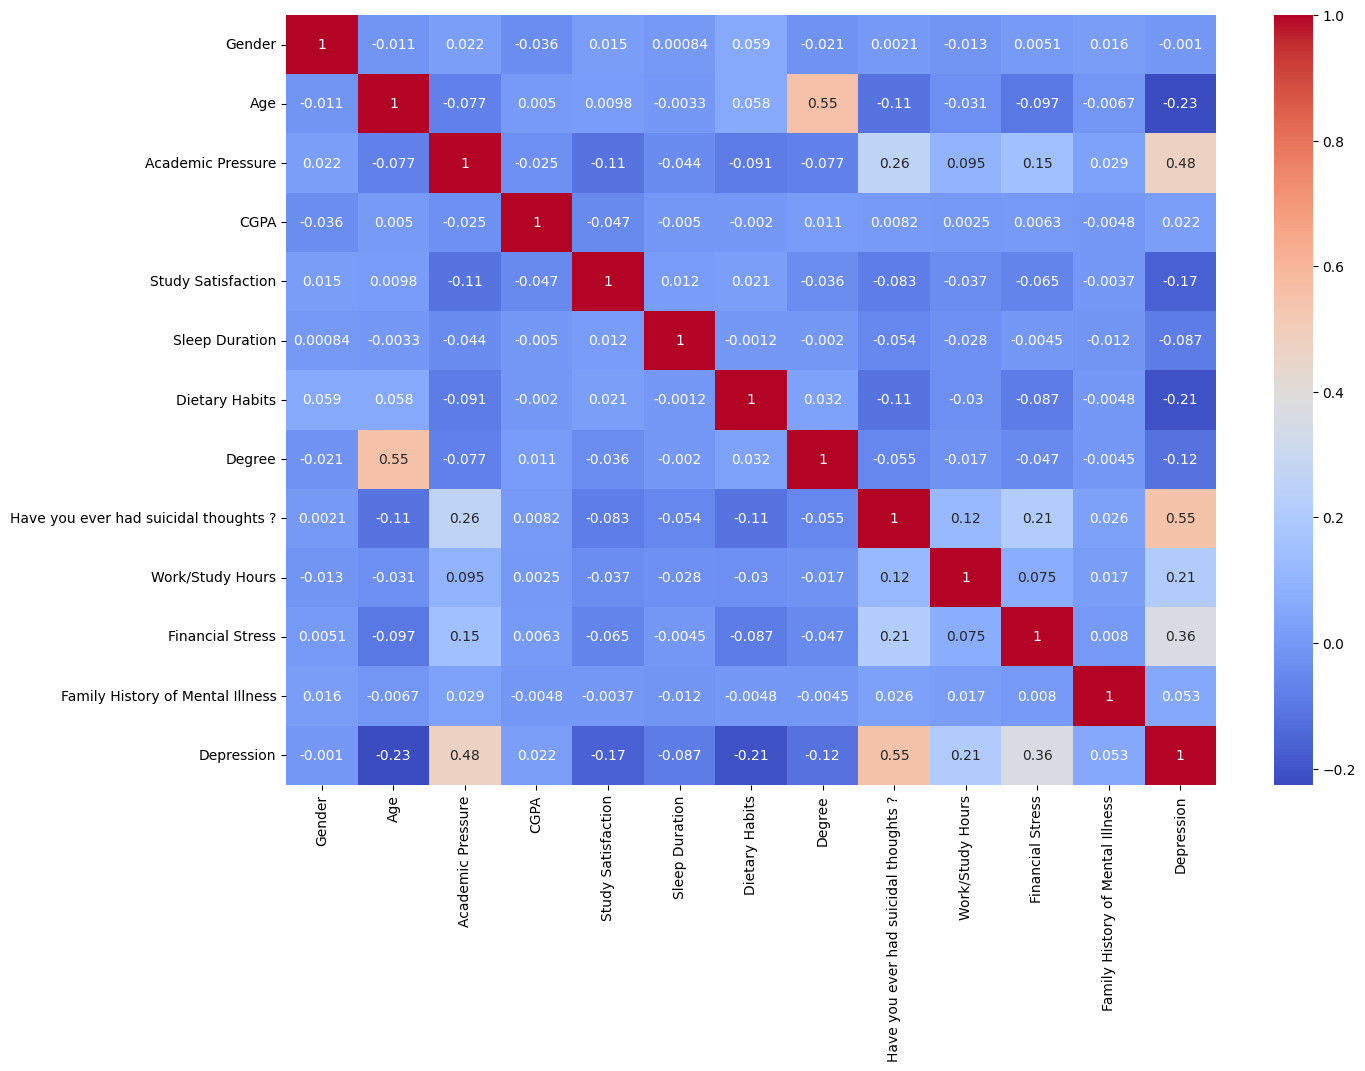

In [26]:
# Set the size of the figure
plt.figure(figsize=(15, 10))

# Plot the heatmap for the correlation matrix of the dataframe 'df'
sns.heatmap(dfnum.corr(), annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

This is a correlation heatmap showing the relationships between different variables. Correlation values range from -1 (strong negative relationship) to 1 (strong positive relationship), with 0 meaning no relationship. For example, "Age" has a strong positive correlation of 0.55 with "Degree," meaning older individuals are likely in higher-degree programs. "Depression" has a 0.48 correlation with "Academic Pressure" and 0.55 with "Have you ever had suicidal thoughts?" suggesting these factors are closely linked. On the other hand, variables like "Gender" and "Financial Stress" show very weak or negligible correlations (close to 0) with most other variables, meaning they don’t strongly affect them.

## Clustering

In [27]:
# Select all relevant features for the new dataframe
df_new = df[['Have you ever had suicidal thoughts ?', 'Academic Pressure', 'Depression']]

# Display the first few rows of the new dataframe to verify
df_new.head()

,Have you ever had suicidal thoughts ?,Academic Pressure,Depression
0,1,5.0,1
1,0,2.0,0
2,0,3.0,0
3,1,3.0,1
4,1,4.0,0


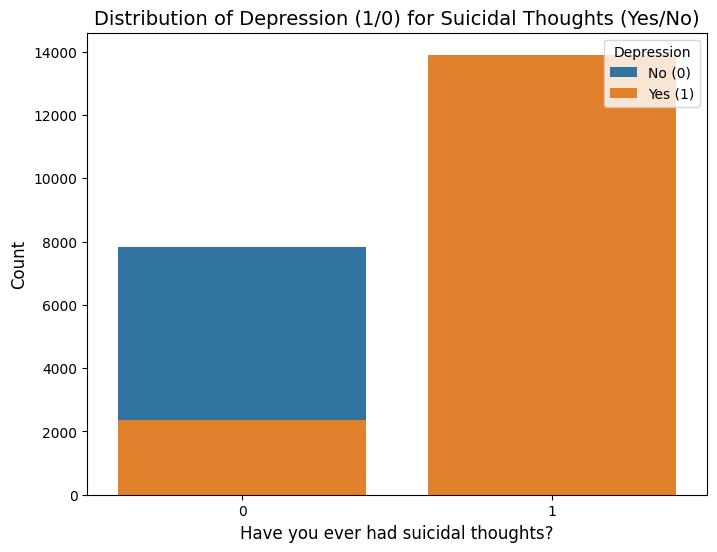

In [28]:
# Create a stacked bar plot
plt.figure(figsize=(8,6))
sns.countplot(data=df_new, x='Have you ever had suicidal thoughts ?', hue='Depression', dodge=False)
plt.title('Distribution of Depression (1/0) for Suicidal Thoughts (Yes/No)', fontsize=14)
plt.xlabel('Have you ever had suicidal thoughts?', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Depression', loc='upper right', labels=['No (0)', 'Yes (1)'])
plt.show()

This bar chart shows the distribution of depression (labeled as 1 for "Yes" and 0 for "No") in relation to whether individuals have had suicidal thoughts. For those who answered "No" to having suicidal thoughts (label 0 on the x-axis), there are more individuals without depression (blue) compared to those with depression (orange). Conversely, for individuals who answered "Yes" to having suicidal thoughts (label 1 on the x-axis), the majority experience depression (orange), showing a strong connection between suicidal thoughts and depression. The count of people with depression significantly increases for those with suicidal thoughts.

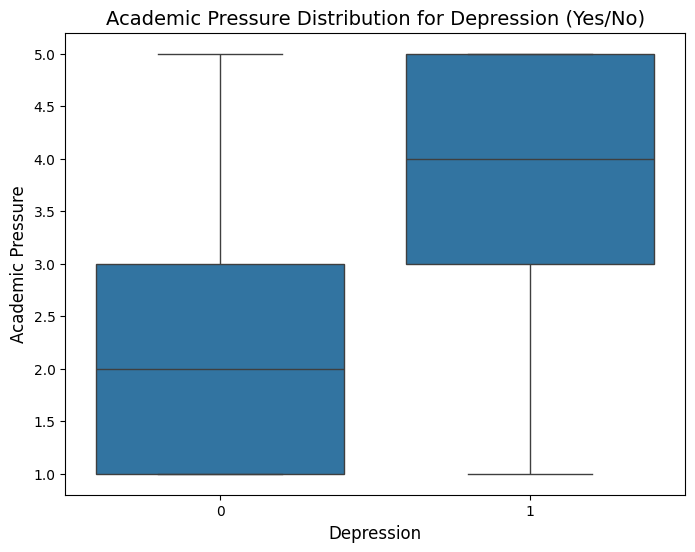

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_new, x='Depression', y='Academic Pressure')
plt.title('Academic Pressure Distribution for Depression (Yes/No)', fontsize=14)
plt.xlabel('Depression', fontsize=12)
plt.ylabel('Academic Pressure', fontsize=12)
plt.show()

The boxplot illustrates the distribution of academic pressure scores for individuals with and without depression. The median academic pressure score is higher for those without depression compared to those with depression. The spread of scores is also wider for the group without depression, indicating greater variability in their perception of academic pressure. While both groups have some outliers, the overall trend suggests a possible association between depression and lower perceived academic pressure. However, further analysis is needed to confirm a statistically significant relationship.

In [30]:
# scaling data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(df_scaled, columns=df_new.columns)
df_scaled.head()

,Have you ever had suicidal thoughts ?,Academic Pressure,Depression
0,0.760886,1.345348,0.840370
1,-1.314257,-0.827894,-1.189952
2,-1.314257,-0.103480,-1.189952
3,0.760886,-0.103480,0.840370
4,0.760886,0.620934,-1.189952


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

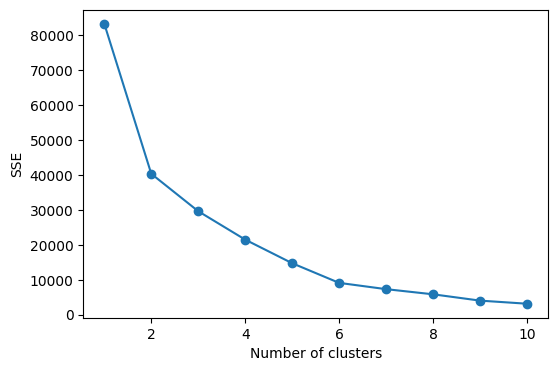

In [31]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

The plot shows the relationship between the number of clusters and the sum of squared errors (SSE). The SSE is a measure of how well the data points are clustered together. As the number of clusters increases, the SSE generally decreases because each data point is closer to its assigned cluster centroid. However, there is a point where adding more clusters does not significantly reduce the SSE. This is known as the "elbow point" because the plot resembles an elbow at this point. In this case, the elbow point appears to be around 4 clusters. This suggests that using 4 clusters is a good balance between having a low SSE and not overfitting the data.

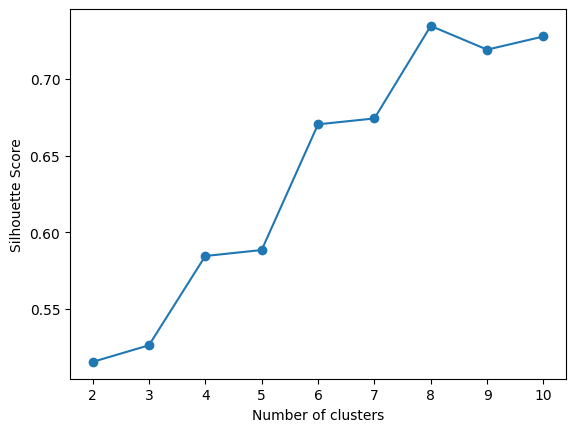

In [32]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


The plot shows the relationship between the number of clusters and the silhouette score. The silhouette score is a measure of how well-separated the clusters are from each other. A high silhouette score indicates that the clusters are well-defined and distinct. As the number of clusters increases, the silhouette score generally increases because the clusters become more specialized and less overlapping. However, there is a point where adding more clusters does not significantly improve the silhouette score, and it may even start to decrease. This suggests that there is an optimal number of clusters that provides a good balance between having well-separated clusters and not overfitting the data. In this case, the silhouette score appears to peak at around 8 clusters, indicating that this is likely the optimal number of clusters for this dataset.

In [33]:
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print("The best k for your model is", kneedle.elbow)

The best k for your model is 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [34]:
kmeans = KMeans(n_clusters=8, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)

In [35]:
# Inverse transform the scaled data to get the original values
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)

# Add the cluster labels to the original data
df_inverse['KMeans'] = y_pred

# Analyze the clusters with the original values
df_inverse.head()

,Have you ever had suicidal thoughts ?,Academic Pressure,Depression,KMeans
0,1.0,5.0,1.0,3
1,0.0,2.0,0.0,5
2,0.0,3.0,0.0,7
3,1.0,3.0,1.0,2
4,1.0,4.0,0.0,0


In [36]:
silhouette_avg = silhouette_score(df_scaled, y_pred)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7345759671299263


Display the cluster summary in the form of a dataframe:

For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
For continuous columns: mean.
Cluster results: count.

In [37]:
# aggregation
cluster_summary = df_inverse.groupby(
    'KMeans').agg({
    'Have you ever had suicidal thoughts ?': ['mean', 'min', 'max'],
    'Academic Pressure': ['mean', 'min', 'max'],
    'Depression': ['mean', 'min', 'max']
})

cluster_summary = cluster_summary.T
cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]
cluster_summary.columns.name = 'KMeans'

cluster_summary

KMeans                                      Cluster 0  Cluster 1  Cluster 2  \
Have you ever had suicidal thoughts ? mean   1.000000   0.000000   1.000000   
                                      min    1.000000   0.000000   1.000000   
                                      max    1.000000   0.000000   1.000000   
Academic Pressure                     mean   3.580254   3.902904   2.524095   
                                      min    3.000000   2.000000   1.000000   
                                      max    5.000000   5.000000   3.000000   
Depression                            mean   0.000000   1.000000   1.000000   
                                      min    0.000000   1.000000   1.000000   
                                      max    0.000000   1.000000   1.000000   

KMeans                                      Cluster 3  Cluster 4  Cluster 5  \
Have you ever had suicidal thoughts ? mean        1.0   1.000000   0.000000   
                                      min         1.0   1.000000   0.000000   
                                      max         1.0   1.000000   0.000000   
Academic Pressure                     mean        5.0   1.409406   1.386279   
                                      min         5.0   1.000000   1.000000   
                                      max         5.0   2.000000   2.000000   
Depression                            mean        1.0   0.000000   0.034083   
                                      min         1.0   0.000000   0.000000   
                                      max         1.0   0.000000   1.000000   

KMeans                                      Cluster 6  Cluster 7  
Have you ever had suicidal thoughts ? mean        1.0   0.000000  
                                      min         1.0   0.000000  
                                      max         1.0   0.000000  
Academic Pressure                     mean        4.0   3.590159  
                                      min         4.0   3.000000  
                                      max         4.0   5.000000  
Depression                            mean        1.0   0.000000  
                                      min         1.0   0.000000  
                                      max         1.0   0.000000

## Result:
- Cluster 0 : In Cluster 0, everyone has experienced suicidal thoughts, but there is a moderate level of academic pressure. The academic pressure is around 3.58 on average, which is neither very high nor very low. There is no depression in this cluster, indicating that although individuals face some academic challenges, they do not report experiencing depression.

- Cluster 1 : Cluster 1 is characterized by individuals who have not experienced suicidal thoughts, but they face high academic pressure, with an average score of 3.90. These individuals also report significant depression, as the average depression score is 1. This suggests that while suicidal thoughts are not common, the individuals in this cluster are struggling with both academic stress and depression.

- Cluster 2 : In Cluster 2, everyone has experienced suicidal thoughts, but the individuals in this group report low academic pressure, with an average score of 2.52. Despite the relatively low academic pressure, depression is present, with an average score of 1. This cluster shows that even with low academic pressure, suicidal thoughts and depression are significant factors for these individuals.

- Cluster 3 : Cluster 3 stands out with very high academic pressure, scoring 5 on average, which indicates extreme stress related to academics. Despite this, everyone in this cluster has experienced suicidal thoughts, and they also report significant depression, with an average depression score of 1. This group is facing both severe academic pressure and depression, which may contribute to their suicidal thoughts.

- Cluster 4 : Cluster 4 consists of individuals who have experienced suicidal thoughts, but they report low academic pressure, with an average score of 1.41. There is no depression in this group, indicating that despite the presence of suicidal thoughts, academic stress is not an issue, and they do not face depression.

- Cluster 5 : Cluster 5 represents individuals who have not experienced suicidal thoughts and report very low academic pressure, with an average score of 1.39. Additionally, depression is almost nonexistent in this cluster, with a very low depression score of 0.03. This cluster is characterized by low stress and minimal mental health concerns.

- Cluster 6 : In Cluster 6, everyone has experienced suicidal thoughts, and they report a moderate level of academic pressure, with an average score of 4. This group also shows signs of depression, with a depression score of 1. Individuals in this cluster are facing both academic stress and depression, contributing to their suicidal thoughts.

- Cluster 7 : Cluster 7 consists of individuals who have not experienced suicidal thoughts and face moderate academic pressure, with an average score of 3.59. These individuals also do not report depression, indicating that they are under some academic stress but are not affected by depression or suicidal thoughts.

Overall Summary : Clusters with suicidal thoughts include Cluster 0, 2, 3, and 6, with varying levels of academic pressure and depression. Clusters with high academic pressure are found in Clusters 1, 3, 6, and 7, with Cluster 3 having the most extreme pressure. Depression is more prominent in Clusters 1, 2, 3, and 6, while Clusters 4, 5, and 7 show little to no depression. These differences highlight how academic pressure and depression impact individuals differently across clusters.

In [38]:
# count data from each cluster
cluster_count = df_inverse['KMeans'].value_counts().sort_index()
cluster_count.name = 'KMeans'
cluster_count

,KMeans
KMeans,
0,1651
1,2204
2,5997
3,4559
4,2020
5,4577
6,3348
7,3394


## Hierarchical Clustering

Hierarchical clustering uses the agglomerative method

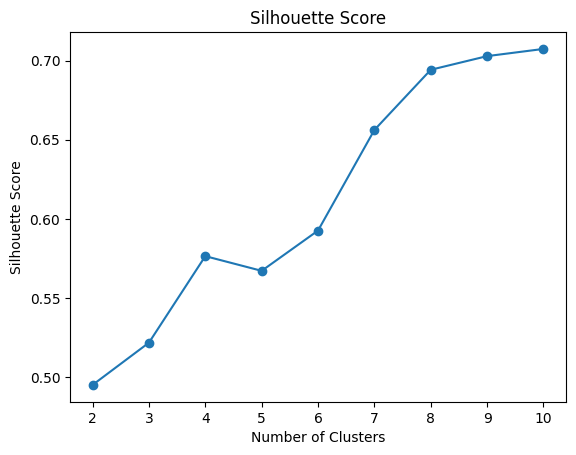

In [39]:
silhouette_scores = []
for i in range(2, 11):
    hierarchical = fcluster(linkage(df_scaled, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_scaled, hierarchical)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

The silhouette score, a measure of cluster separation, peaks at 10 clusters in the provided plot. This suggests that 10 clusters likely represent the optimal number for this dataset, striking a balance between well-defined clusters and avoiding overfitting.

In [40]:
linkage_methods = ['single', 'complete', 'average', 'ward']
silhouette_scores = {}

for method in linkage_methods:
    hc = AgglomerativeClustering(n_clusters=8, linkage=method)
    labels = hc.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_scores[method] = silhouette_avg
    print(f"Silhouette Score for {method}: {silhouette_avg}")

Silhouette Score for single: 0.5686598345937928
Silhouette Score for complete: 0.6331712538155988
Silhouette Score for average: 0.6748516338868221
Silhouette Score for ward: 0.6941593916312928


The results show that the "ward" linkage method achieves the highest silhouette score (0.6941), indicating that it forms clusters with the best separation between data points. This suggests that using the "ward" linkage method likely results in more meaningful and interpretable clusters for the given dataset, as the data points within each cluster are likely to be more similar to each other and distinct from other clusters.

The graph shows how well our data is grouped. We get the best results by dividing the data into either two or three groups. When we try to make more groups, the data gets mixed up and the groups become less clear.

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [41]:
# agglomerative clustering
hc = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
y_pred_hc = hc.fit_predict(df_scaled)

In [42]:
# Add the cluster labels to the original data that you have added with kmeans so you have a full dataframe including kmeans and agglo clustering
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
df_inverse['Agglo'] = y_pred_hc

# show the df
df_inverse.head()

,Have you ever had suicidal thoughts ?,Academic Pressure,Depression,Agglo
0,1.0,5.0,1.0,4
1,0.0,2.0,0.0,2
2,0.0,3.0,0.0,2
3,1.0,3.0,1.0,3
4,1.0,4.0,0.0,0


In [43]:
silhouette_avg_hc = silhouette_score(df_scaled, y_pred_hc)
print("Silhouette Score:", silhouette_avg_hc)

Silhouette Score: 0.6941593916312928


Display the cluster summary in the form of a dataframe.

In [44]:
# aggregation
cluster_summary = df_inverse.groupby('Agglo').agg({
    'Have you ever had suicidal thoughts ?': ['mean', 'min', 'max'],
    'Academic Pressure': ['mean', 'min', 'max'],
    'Depression': ['mean', 'min', 'max']
})

cluster_summary

Have you ever had suicidal thoughts ?           Academic Pressure       \
                                       mean  min  max              mean  min   
Agglo                                                                          
0                                       1.0  1.0  1.0          2.385726  1.0   
1                                       0.0  0.0  0.0          3.711017  1.0   
2                                       0.0  0.0  0.0          2.530536  2.0   
3                                       1.0  1.0  1.0          3.460967  3.0   
4                                       1.0  1.0  1.0          5.000000  5.0   
5                                       0.0  0.0  0.0          4.434814  4.0   
6                                       1.0  1.0  1.0          1.629203  1.0   
7                                       0.0  0.0  0.0          1.000000  1.0   

           Depression            
       max       mean  min  max  
Agglo                            
0      5.0        0.0  0.0  0.0  
1      5.0        1.0  1.0  1.0  
2      3.0        0.0  0.0  0.0  
3      4.0        1.0  1.0  1.0  
4      5.0        1.0  1.0  1.0  
5      5.0        0.0  0.0  0.0  
6      2.0        1.0  1.0  1.0  
7      1.0        0.0  0.0  0.0

Cluster 0:
Everyone in this cluster has experienced suicidal thoughts. Academic pressure is low to moderate, and there is no depression reported.

Cluster 1:
No one in this cluster has experienced suicidal thoughts. They face high academic pressure, and depression is present in all individuals.

Cluster 2:
No suicidal thoughts or depression are reported in this cluster. Academic pressure is low and consistent among individuals.

Cluster 3:
Everyone in this cluster has experienced suicidal thoughts. They face moderate to high academic pressure and significant depression.

Cluster 4:
This cluster has very high academic pressure, and all individuals experience both suicidal thoughts and depression.

Cluster 5:
No suicidal thoughts or depression are present in this cluster. Academic pressure is high but not extreme.

Cluster 6:
Everyone in this cluster has experienced suicidal thoughts. Academic pressure is very low, but depression is reported by all individuals.

Cluster 7:
This cluster has no suicidal thoughts or depression, and academic pressure is minimal.

In [45]:
# count data from each cluster
cluster_counts = df_inverse['Agglo'].value_counts().sort_index()
cluster_counts.name = 'Agglo'
cluster_counts

,Agglo
Agglo,
0,3671
1,2360
2,3766
3,7263
4,4559
5,1396
6,2082
7,2653


Hierarchical Visualization

### Ward linkage

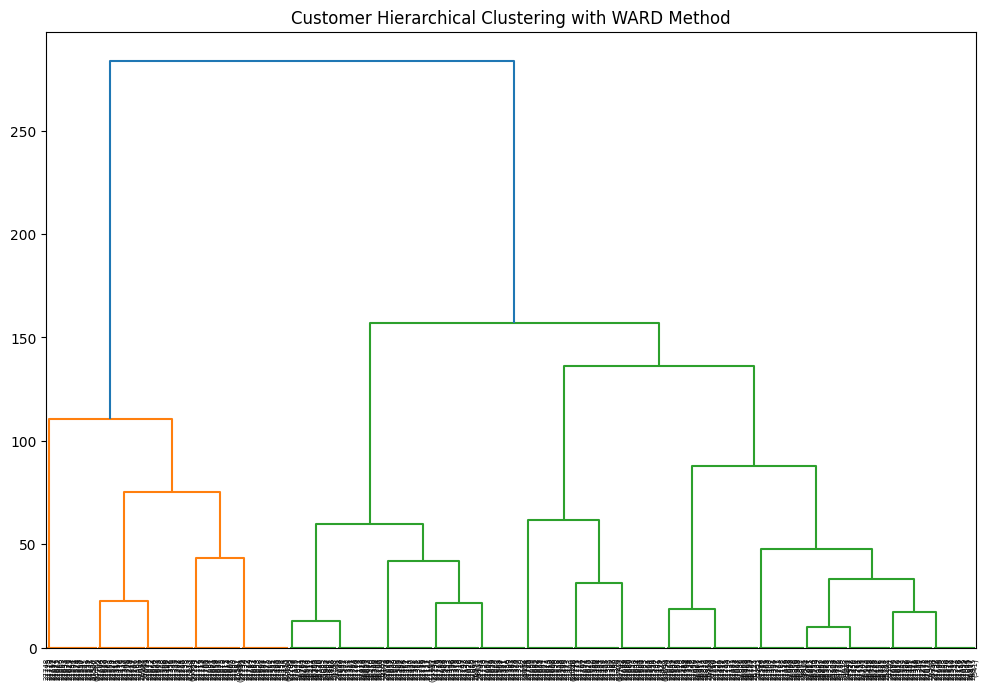

In [46]:
# Perform hierarchical clustering using ward linkage
linked = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='level', orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Customer Hierarchical Clustering with WARD Method')
plt.show()

## Conclusion :
Both clustering techniques revealed similar trends, but K-Means provided a more detailed breakdown of moderate cases (e.g., Cluster 0 and Cluster 6 in K-Means).
Hierarchical clustering better emphasized extreme cases, such as minimal pressure and no mental health issues (Cluster 7) or high pressure and severe mental health challenges (Cluster 4).

## Recommendations
- Support High-Pressure Groups: Provide mental health resources like counseling for individuals facing extreme academic pressure and depression.
- Preventative Measures: Offer stress management workshops for those with moderate pressure to prevent mental health decline.
- Monitor Low-Stress Groups: Maintain well-being programs for individuals with low pressure and no mental health concerns.
- Personalized Support: Address non-academic factors for those with low pressure but high mental health issues.
- Policy Advocacy: Reduce excessive academic pressure through balanced workloads and supportive institutional policies.

## Classification

In [47]:
# X: All features (columns) in the dataset except the 'Depression' and 'City' column. These are the independent variables (features) used for prediction.
# y: The 'Depression' column, which is the target or label to be predicted.

X = df[['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
        'Financial Stress','Family History of Mental Illness']]
y = df['Depression']

In [48]:
#  The data is split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Displays the number of rows (data samples) and columns (features)
X_train.shape, X_test.shape

((22200, 12), (5550, 12))

#### Entropy

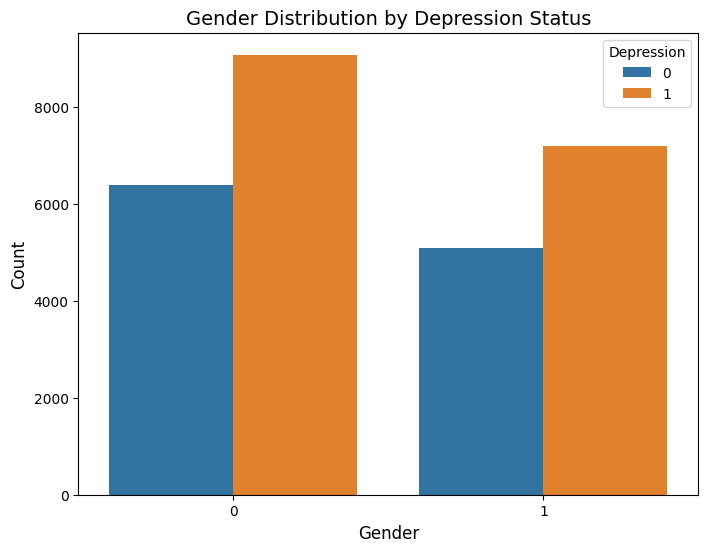

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Gender', hue='Depression')
plt.title('Gender Distribution by Depression Status', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

The bar chart reveals a possible higher prevalence of depression among males compared to females within the studied population. While both genders show a greater proportion of individuals without depression, the bar representing males with depression is slightly taller than that of females, suggesting a potential gender disparity in depression rates within the sample.

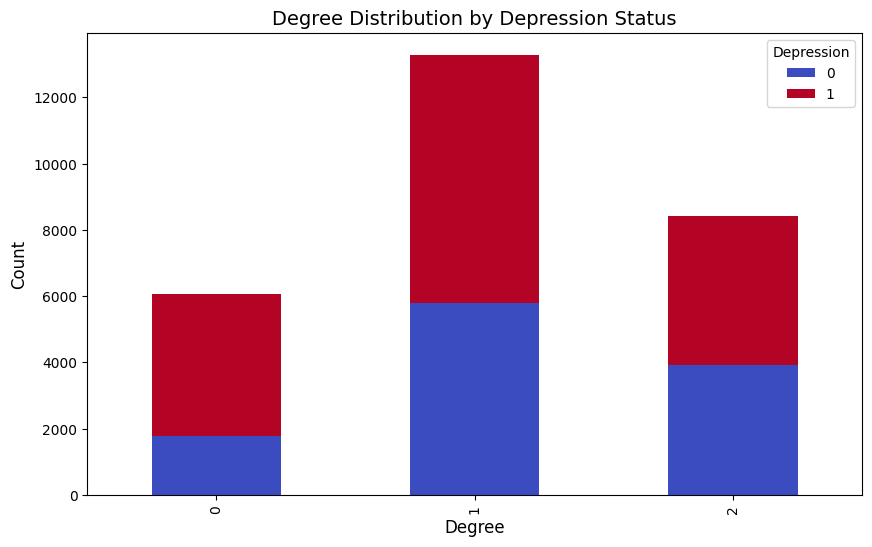

In [51]:
# Stacked bar plot for Degree vs Depression
degree_counts = pd.crosstab(df['Degree'], df['Depression'])
degree_counts.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title('Degree Distribution by Depression Status', fontsize=14)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

The bar chart illustrates the distribution of depression across different educational levels. While the Pre-University group shows a lower prevalence of depression, the Undergraduate group exhibits the highest proportion of individuals experiencing depression, followed by the Postgraduate group. This suggests a potential association between educational level and depression, although further analysis is necessary to confirm this relationship and rule out the influence of other factors.

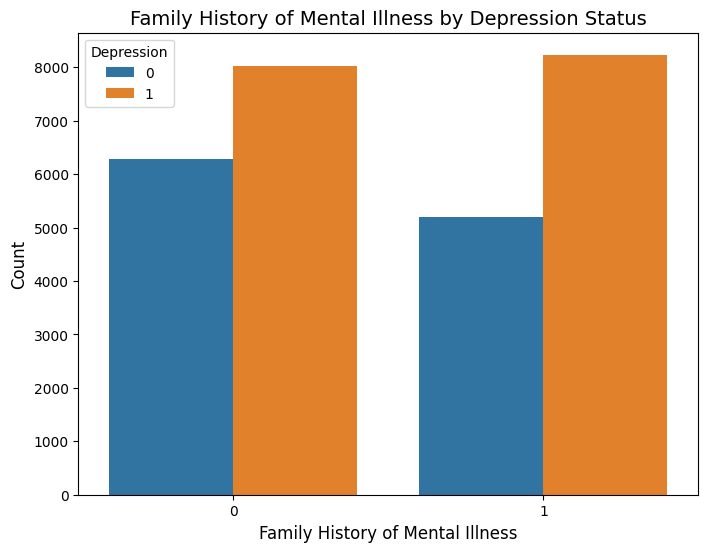

In [52]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Family History of Mental Illness', hue='Depression')
plt.title('Family History of Mental Illness by Depression Status', fontsize=14)
plt.xlabel('Family History of Mental Illness', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

The bar chart titled "Family History of Mental Illness by Depression Status" shows a potential link between family history of mental illness and depression. The x-axis represents whether an individual has a family history of mental illness (0 for no and 1 for yes). The y-axis shows the count of individuals. The bars are stacked, with blue representing individuals without depression and orange representing those with depression. The chart suggests that individuals with a family history of mental illness (x-axis value of 1) have a higher proportion of depression compared to those without such a history. This finding supports the idea that family history may be a risk factor for developing depression.

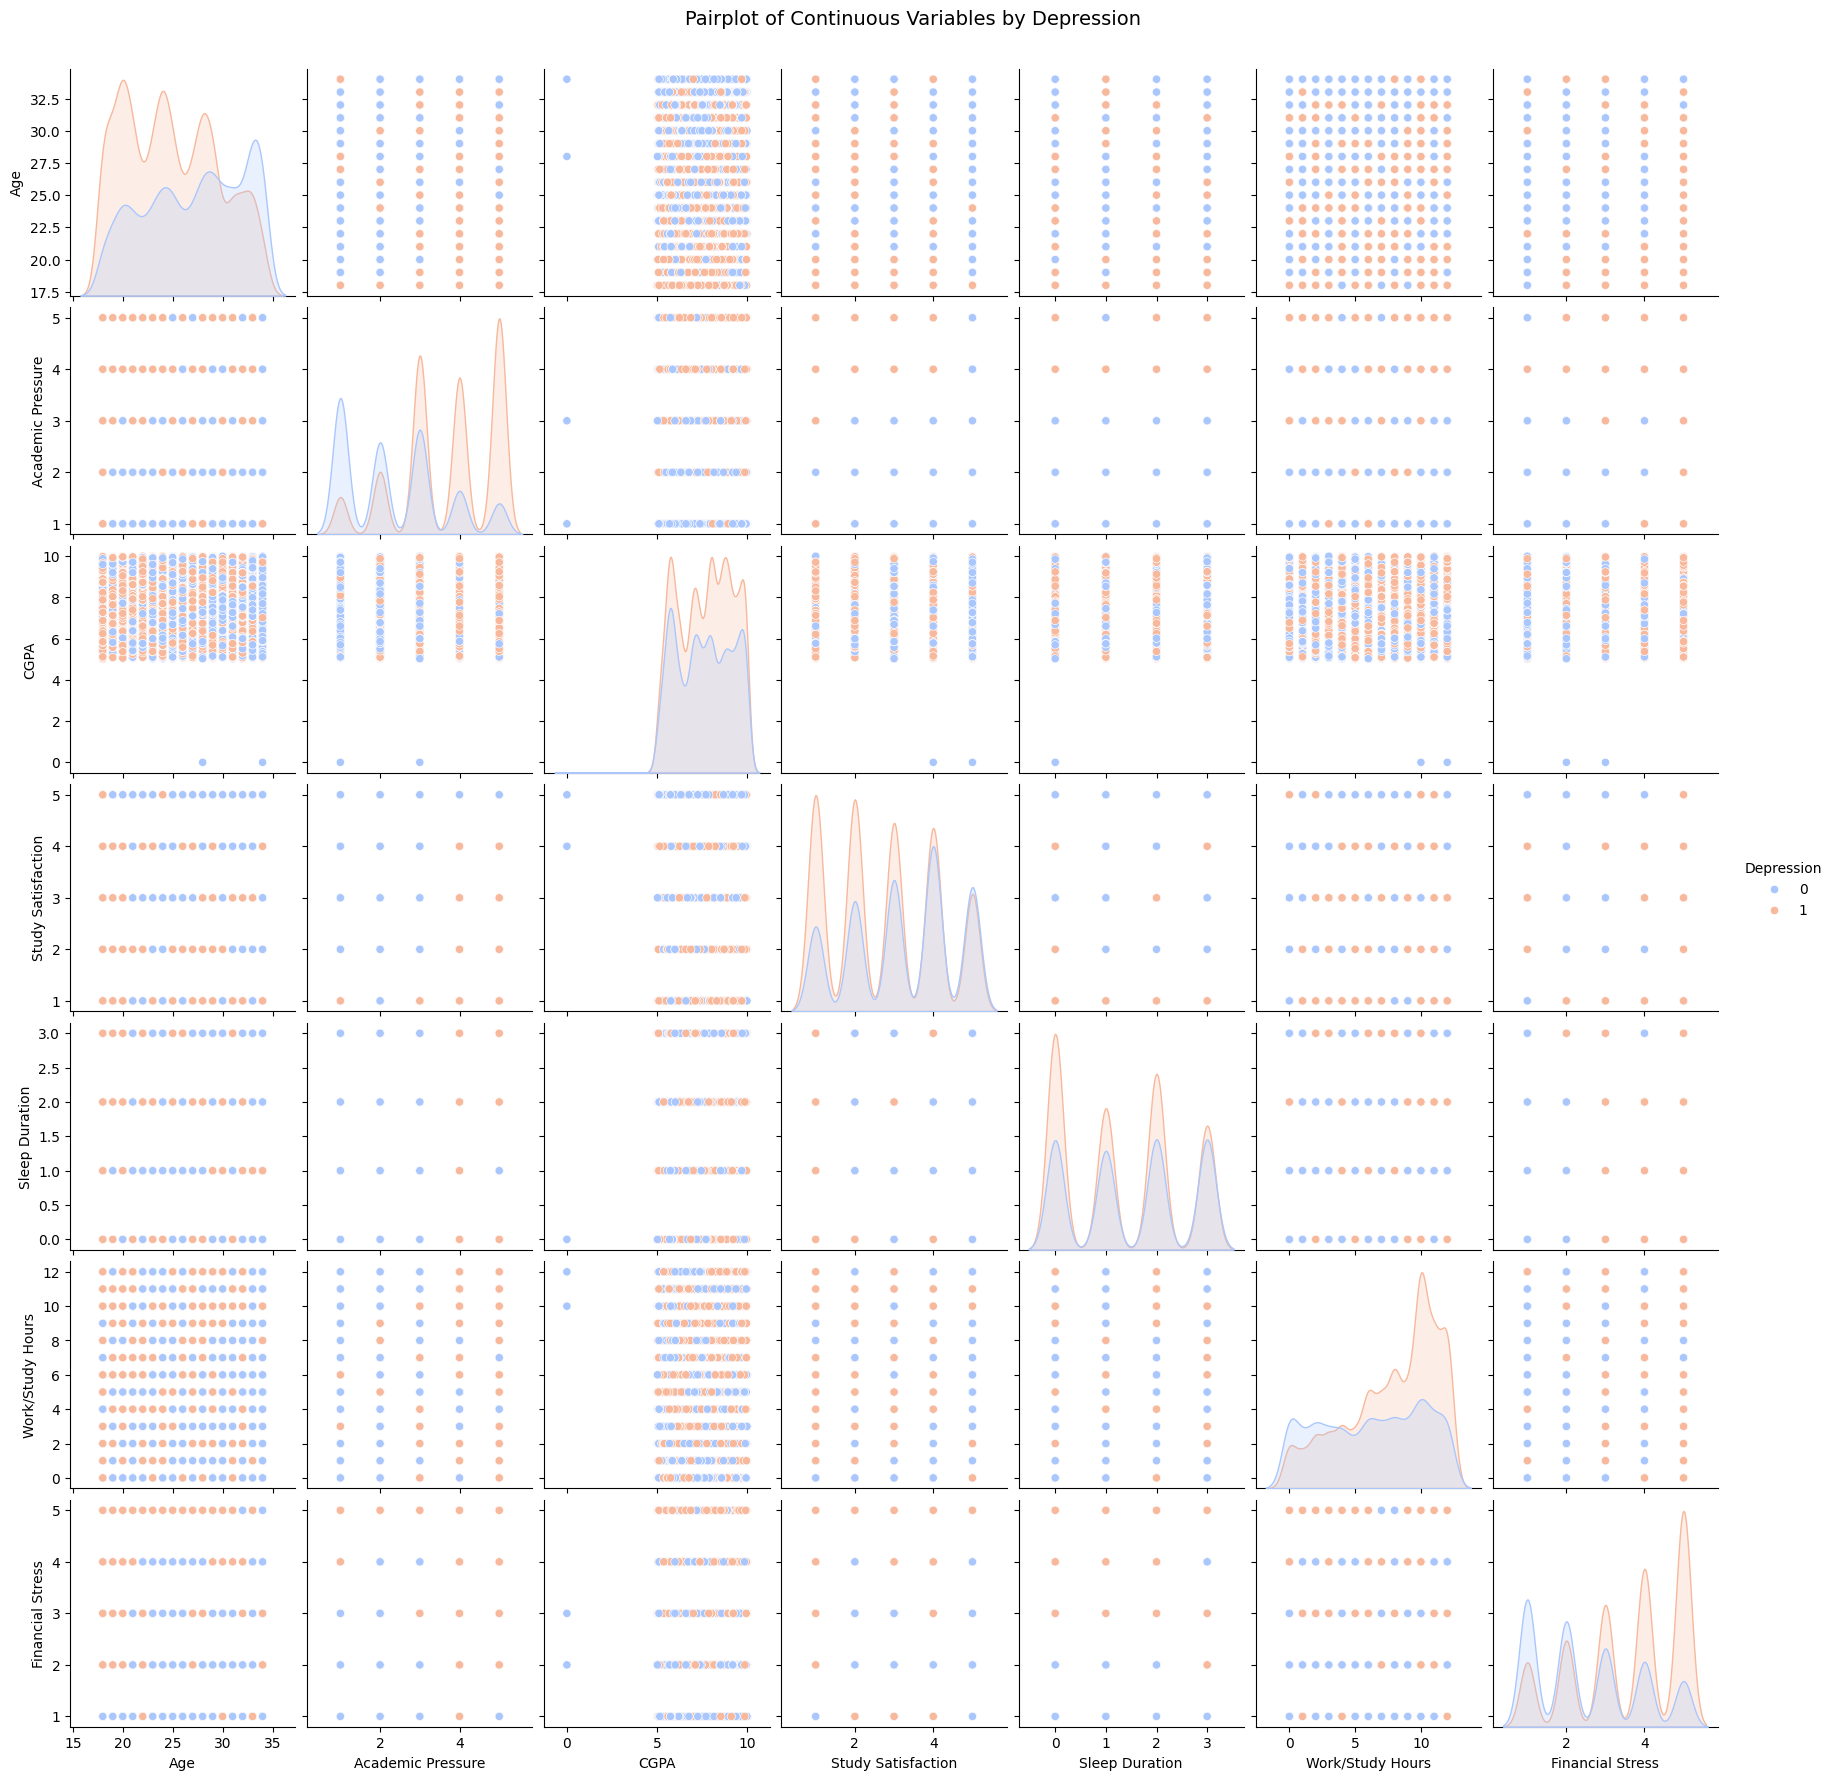

In [53]:
continuous_vars = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Work/Study Hours', 'Financial Stress']
sns.pairplot(df[continuous_vars + ['Depression']], hue='Depression', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot of Continuous Variables by Depression', y=1.02, fontsize=14)
plt.show()

In [54]:
# The decision tree model is trained using the training data with entropy as the splitting criterion
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 42)
model_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [55]:
# The model makes predictions on the test set and calculates accuracy scores for both the training and test sets.
y_pred_entropy = model_entropy.predict(X_test)

accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Model accuracy score with criterion entropy:", accuracy_entropy)

y_train_pred_entropy = model_entropy.predict(X_train)
accuracy_train_entropy = accuracy_score(y_train, y_train_pred_entropy)
accuracy_test_entropy = accuracy_score(y_test, y_pred_entropy)
print("Train Accuracy:", accuracy_train_entropy)
print("Test Accuracy:", accuracy_test_entropy)

Model accuracy score with criterion entropy: 0.8145945945945946
Train Accuracy: 0.8240540540540541
Test Accuracy: 0.8145945945945946


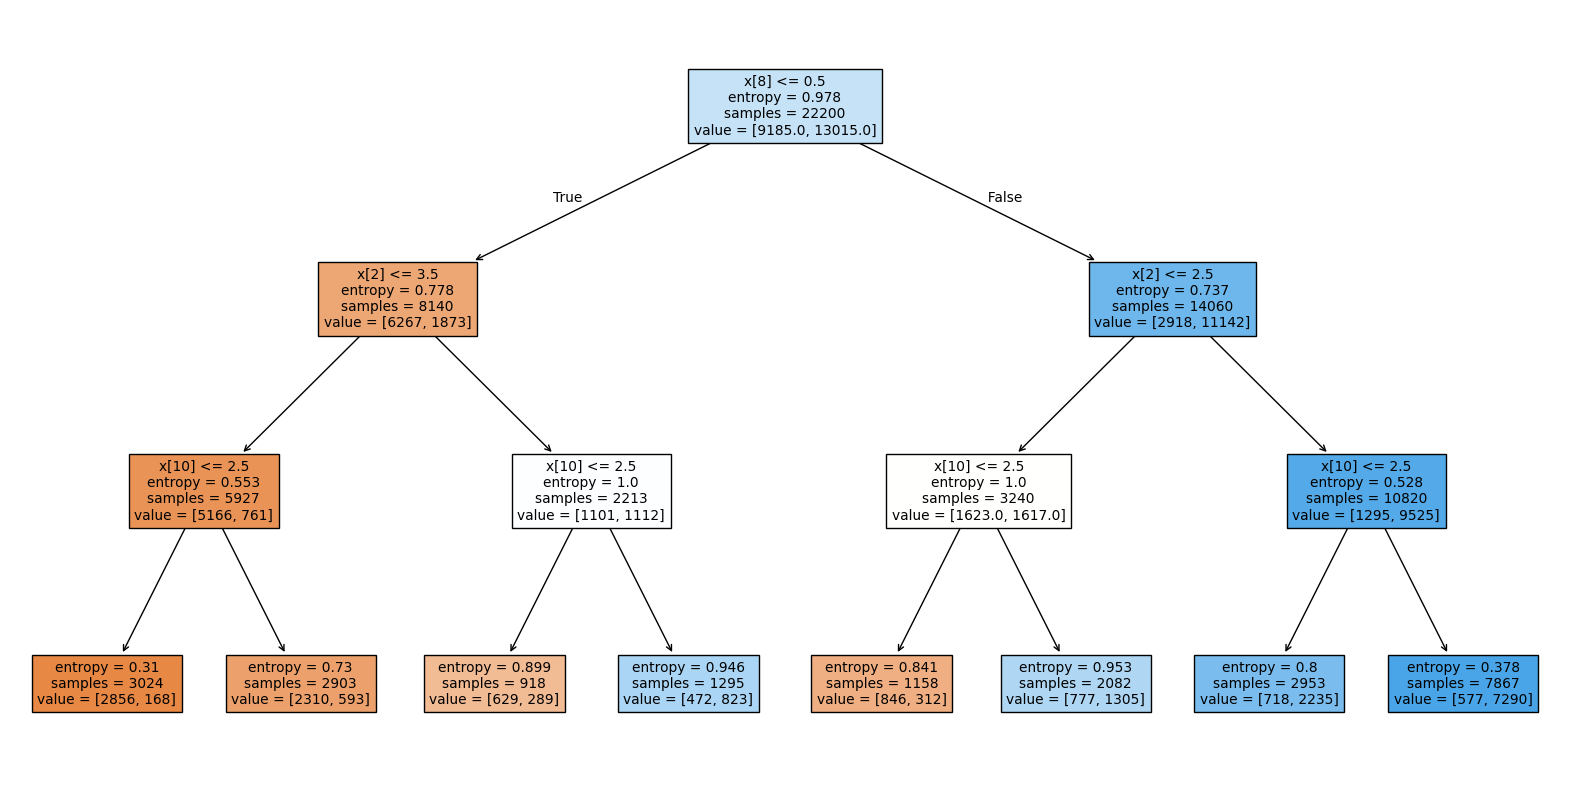

In [56]:
plt.figure(figsize=(20,10))
tree.plot_tree(model_entropy, filled=True)
plt.show()

This decision tree diagram represents the process of classifying data into two categories based on features and entropy values. At the root node (X[8] <= 0.5), the initial split occurs, dividing 22,200 samples into two groups with entropy 0.978. The left branch, where X[8] <= 0.5, has higher entropy and further splits based on X[2] <= 3.5, reducing uncertainty. Subsequent splits refine the classification by evaluating features such as X[10] <= 2.5, minimizing entropy step-by-step. The right branch (X[8] > 0.5) splits based on X[2] <= 2.5, with lower entropy, showing clearer separations. Each leaf node at the bottom represents a final classification group, where entropy is lowest, indicating minimal uncertainty in class assignment.

In [57]:
print("Confusion Matrix Entropy")
print(confusion_matrix(y_test, y_pred_entropy))
print("Classification Report Entropy")

print(classification_report(y_test, y_pred_entropy))

Confusion Matrix Entropy
[[1652  649]
 [ 380 2869]]
Classification Report Entropy
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      2301
           1       0.82      0.88      0.85      3249

    accuracy                           0.81      5550
   macro avg       0.81      0.80      0.81      5550
weighted avg       0.81      0.81      0.81      5550



The confusion matrix shows that out of 5550 test samples, the model correctly predicted 1652 true negatives (class 0), and 2869 true positives (class 1). However, there were 649 false positives (class 0 predicted as class 1) and 380 false negatives (class 1 predicted as class 0).

The classification report provides further details, showing the precision, recall, and F1-score for both classes.
- For class 0, the precision is 0.81, recall is 0.72, and F1-score is 0.76, indicating moderate performance in identifying class 0.
- For class 1, the precision is 0.82, recall is 0.88, and F1-score is 0.85, indicating better performance in identifying class 1. The overall accuracy of the model is 0.81.

#### Naive Bayes

In [58]:
# The Gaussian Naive Bayes model is trained using the training data X_train and target labels y_train
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [59]:
# The model makes predictions on the test set using the trained Gaussian Naive Bayes model
y_pred_nb = nb.predict(X_test)

In [60]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Model accuracy score with Naive Bayes: " , accuracy_nb)

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix (Naive Bayes):")
print(conf_matrix_nb)

Model accuracy score with Naive Bayes:  0.8308108108108108
Confusion Matrix (Naive Bayes):
[[1830  471]
 [ 468 2781]]



The model has an accuracy of 0.83, meaning it correctly predicted 83% of the test samples. The confusion matrix shows 1830 true negatives (correctly predicting class 0), 471 false positives (incorrectly predicting class 1), 468 false negatives (incorrectly predicting class 0), and 2781 true positives (correctly predicting class 1).

In [61]:
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report (Naive Bayes):")
print(class_report_nb)

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2301
           1       0.86      0.86      0.86      3249

    accuracy                           0.83      5550
   macro avg       0.83      0.83      0.83      5550
weighted avg       0.83      0.83      0.83      5550



The classification report shows the performance of the Naive Bayes model for both classes.

- For class 0, the precision is 0.80, meaning 80% of the predicted class 0 instances were correct; the recall is 0.80, meaning the model correctly identified 80% of the actual class 0 instances; and the F1-score is 0.80, which is a balance of precision and recall.
- For class 1, the precision is 0.86, meaning 86% of the predicted class 1 instances were correct; the recall is 0.86, meaning the model correctly identified 86% of the actual class 1 instances; and the F1-score is 0.86, indicating strong performance for class 1.
- The overall accuracy of the model is 0.83, indicating that 83% of all predictions were correct.

# Conclusion :
The Decision Tree model using the entropy criterion achieved an accuracy of 81%, showing a reasonable balance between precision and recall for both classes. It performed better at identifying instances of class 1 (recall of 88%) compared to class 0 (recall of 72%), indicating it is more effective in detecting positive cases. The Naive Bayes model performed slightly better overall, with an accuracy of 83%. It showed balanced precision and recall values (both 80% for class 0 and 86% for class 1) and a higher F1-score for both classes. This indicates that Naive Bayes provides more consistent and reliable predictions across both classes compared to the Decision Tree.

# Recommendations
- Improve Feature Selection: Identify key features and engineer new ones to enhance model performance.
- Hyperparameter Tuning: Experiment with different model parameters to optimize performance.
- Address Class Imbalances: Use techniques like oversampling or class weighting to improve recall.
- Combine Models: Try ensemble methods like Random Forests to boost accuracy.
- Monitor Performance: Regularly validate models to ensure consistent results.